<a href="https://colab.research.google.com/github/mauricionoris/fm/blob/master/SimulacaoMonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação de Monte Carlo

A simulação de Monte Carlo é uma técnica que utiliza números aleatórios para resolver problemas que, de outra forma, exigiriam cálculos analíticos complexos. A ideia central é substituir um problema determinístico por um processo estatístico, em que se realizam muitos experimentos virtuais e, a partir da média dos resultados, se aproxima o valor real procurado.

No contexto desta simulação, usamos o método de Monte Carlo para estimar o valor de π através da geração de pontos aleatórios dentro de um quadrado que contém um círculo inscrito. Ao contar quantos pontos caem dentro do círculo em relação ao total de pontos gerados, obtemos uma proporção que se aproxima da razão entre as áreas do círculo e do quadrado.

Esse tipo de abordagem é muito usado em Inteligência Artificial e Machine Learning, especialmente quando lidamos com incerteza, amostragem e otimização. Modelos probabilísticos, redes bayesianas, algoritmos de aprendizado por reforço e técnicas de integração em espaços de alta dimensão frequentemente dependem de estimativas Monte Carlo para fazer inferências ou atualizar parâmetros.

Por fim, a força do método está na sua simplicidade e generalidade — mesmo sem conhecer equações fechadas ou derivadas complexas, podemos obter aproximações confiáveis apenas com amostragem aleatória e poder computacional suficiente.

# Estimando o valor de π com o método de Monte Carlo

O número π pode ser estimado **probabilisticamente**, simulando pontos aleatórios dentro de um **quadrado**
e verificando quantos caem dentro do **círculo inscrito**.

### Ideia:
- Área do quadrado = 4 (lado = 2)
- Área do círculo de raio 1 = π
- Razão entre as áreas:  
  $$
  \frac{\text{área do círculo}}{\text{área do quadrado}} = \frac{π}{4}
  $$
  
Logo,  
$$
π ≈ 4 \times \frac{\text{pontos dentro do círculo}}{\text{total de pontos}}
$$

Esse tipo de simulação é chamado de **Método de Monte Carlo**, e é amplamente usado em **Inteligência Artificial**,
**otimização estocástica** e **modelagem probabilística** (como em redes bayesianas e inferência variacional).


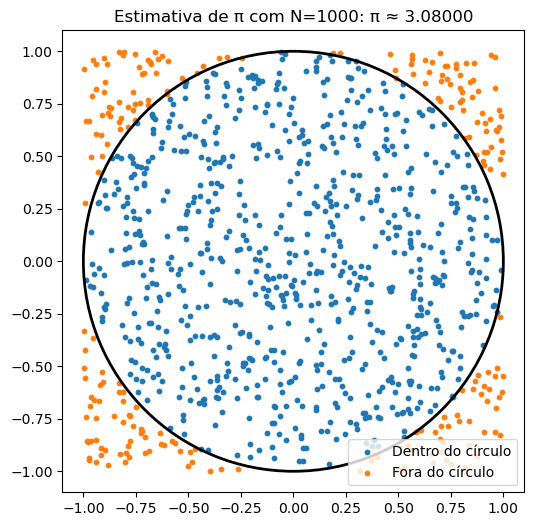

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------------------
# Função para estimar π
# -------------------------------------------------------------
def estimate_pi(n, seed=None):
    rng = np.random.default_rng(seed)
    x = rng.uniform(-1, 1, n)
    y = rng.uniform(-1, 1, n)
    inside = x**2 + y**2 <= 1
    pi_estimate = 4 * np.sum(inside) / n
    return pi_estimate, x, y, inside

# -------------------------------------------------------------
# Visualização inicial — pontos dentro e fora do círculo
# -------------------------------------------------------------
N = 1000
pi_est, x, y, inside = estimate_pi(N, seed=42)

plt.figure(figsize=(6,6))
plt.scatter(x[inside], y[inside], s=10, label="Dentro do círculo")
plt.scatter(x[~inside], y[~inside], s=10, label="Fora do círculo")
circle = plt.Circle((0, 0), 1, fill=False, linewidth=2)
plt.gca().add_patch(circle)
plt.gca().set_aspect("equal", "box")
plt.title(f"Estimativa de π com N={N}: π ≈ {pi_est:.5f}")
plt.legend()
plt.show()

# Convergência de π

Conforme aumentamos o número de amostras, a estimativa de π **tende ao valor real** (≈ 3.14159).  
Isso é uma manifestação da **Lei dos Grandes Números**, que garante a estabilidade de médias amostrais em experimentos aleatórios.

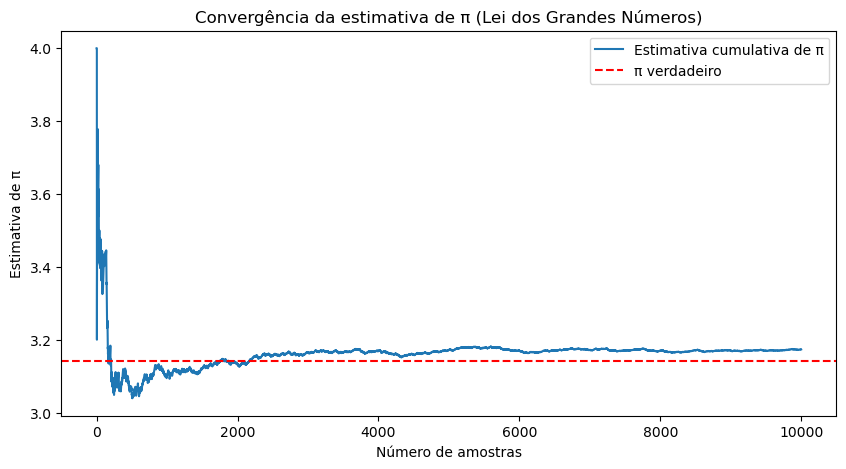

In [2]:
N = 10000
rng = np.random.default_rng(123)
x = rng.uniform(-1, 1, N)
y = rng.uniform(-1, 1, N)
inside = x**2 + y**2 <= 1
pi_estimates = 4 * np.cumsum(inside) / np.arange(1, N + 1)

plt.figure(figsize=(10,5))
plt.plot(pi_estimates, label="Estimativa cumulativa de π")
plt.axhline(np.pi, color='r', linestyle='--', label='π verdadeiro')
plt.xlabel("Número de amostras")
plt.ylabel("Estimativa de π")
plt.title("Convergência da estimativa de π (Lei dos Grandes Números)")
plt.legend()
plt.show()


# Análise do Erro

O erro absoluto da estimativa de π decresce aproximadamente com **1/√N**,
caracterizando o comportamento típico de métodos de Monte Carlo.

Isso mostra que, para obter mais precisão, precisamos aumentar muito o número de amostras.

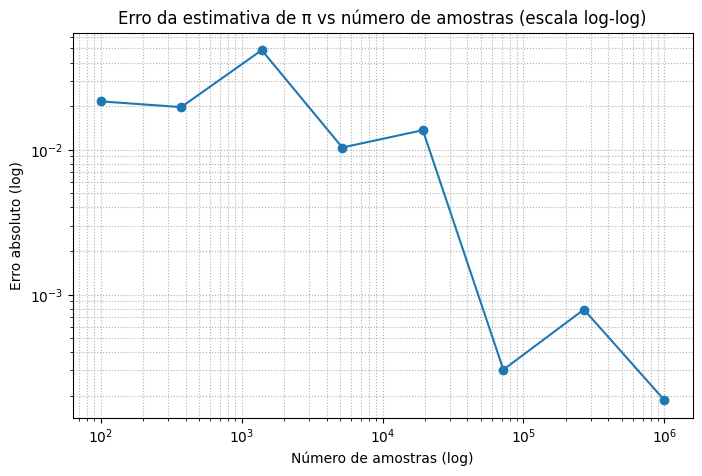

In [4]:
sample_sizes = np.logspace(2, 6, num=8, dtype=int)
errors = []
for n in sample_sizes:
    est, _, _, _ = estimate_pi(n, seed=42)
    errors.append(abs(est - np.pi))

plt.figure(figsize=(8,5))
plt.plot(sample_sizes, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de amostras (log)')
plt.ylabel('Erro absoluto (log)')
plt.title('Erro da estimativa de π vs número de amostras (escala log-log)')
plt.grid(True, which="both", ls=":")
plt.show()

## Relação com Inteligência Artificial

O método de Monte Carlo é essencial em IA para lidar com **incerteza e amostragem**.  
Exemplos de aplicações:
- **Inferência Bayesiana**: estimar distribuições complexas via amostragem.
- **Reforço e Planejamento**: estimar valores esperados de ações.
- **Dropout em Redes Neurais**: aproxima inferência bayesiana.
- **Simulações estocásticas** em otimização e controle.

Assim como nesta estimativa de π, muitos algoritmos em IA dependem de **amostras aleatórias**
para aproximar valores esperados, probabilidades e integrais difíceis de calcular analiticamente.

Estimativa Monte Carlo da área da estrela: 0.8000
Área real (Shapely): 1.1756
Erro relativo: 31.95%


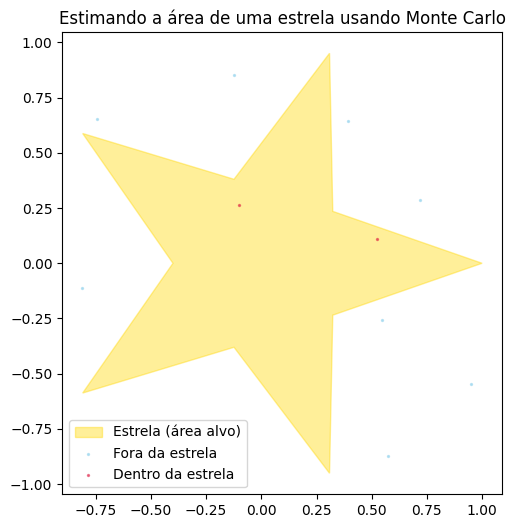

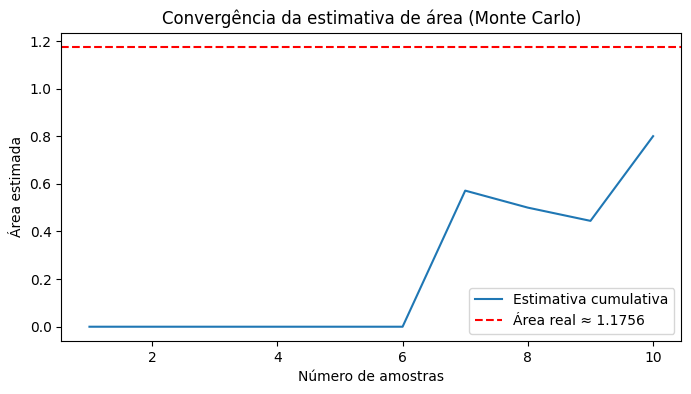

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from shapely.affinity import rotate


def star_points(center=(0, 0), outer_radius=1.0, inner_radius=0.4, num_points=5):
    """Gera coordenadas de uma estrela de n pontas"""
    cx, cy = center
    points = []
    angle = np.pi / num_points
    for i in range(2 * num_points):
        r = outer_radius if i % 2 == 0 else inner_radius
        theta = i * angle
        x = cx + r * np.cos(theta)
        y = cy + r * np.sin(theta)
        points.append((x, y))
    return points

star = Polygon(star_points())
circle_radius = 1.0
circle_area = np.pi * circle_radius**2


N = 10
rng = np.random.default_rng(42)
xs = rng.uniform(-circle_radius, circle_radius, N)
ys = rng.uniform(-circle_radius, circle_radius, N)

points = np.vstack((xs, ys)).T
inside_star = np.array([star.contains(Point(x, y)) for x, y in points])


frac_inside = inside_star.mean()
estimated_area = frac_inside * (4 * circle_radius**2)  # área do quadrado [-1,1]^2
true_area = star.area
error = abs(estimated_area - true_area) / true_area

print(f"Estimativa Monte Carlo da área da estrela: {estimated_area:.4f}")
print(f"Área real (Shapely): {true_area:.4f}")
print(f"Erro relativo: {error*100:.2f}%")


plt.figure(figsize=(6,6))
plt.fill(*star.exterior.xy, color='gold', alpha=0.4, label='Estrela (área alvo)')
plt.scatter(xs[~inside_star], ys[~inside_star], s=2, color='skyblue', alpha=0.5, label='Fora da estrela')
plt.scatter(xs[inside_star], ys[inside_star], s=2, color='crimson', alpha=0.5, label='Dentro da estrela')
plt.gca().set_aspect('equal', 'box')
plt.title("Estimando a área de uma estrela usando Monte Carlo")
plt.legend()
plt.show()


inside_cumsum = np.cumsum(inside_star)
n = np.arange(1, N+1)
area_estimates = (inside_cumsum / n) * (4 * circle_radius**2)

plt.figure(figsize=(8,4))
plt.plot(n, area_estimates, label='Estimativa cumulativa')
plt.axhline(true_area, color='red', linestyle='--', label=f'Área real ≈ {true_area:.4f}')
plt.xlabel('Número de amostras')
plt.ylabel('Área estimada')
plt.title('Convergência da estimativa de área (Monte Carlo)')
plt.legend()
plt.show()


# Exercício

1. Implemente novamente a função `estimate_pi`, mas permitindo escolher o **raio** do círculo.
2. Verifique se a estimativa de π permanece correta para diferentes raios.
3. Plote um gráfico mostrando a variação da estimativa conforme o raio.
4. Discuta: o que acontece se o círculo não estiver centralizado na origem?

1. Implemente novamente a função `estimate_pi`, mas permitindo escolher o **raio** do círculo.


In [ ]:
import numpy as np

def estimate_pi(n, radius=1.0, center=(0.0, 0.0), seed=None):

    rng = np.random.default_rng(seed)
    cx, cy = center
    x = rng.uniform(cx - radius, cx + radius, n)
    y = rng.uniform(cy - radius, cy + radius, n)
    inside = (x - cx)**2 + (y - cy)**2 <= radius**2
    pi_estimate = 4 * np.sum(inside) / n
    return pi_estimate, x, y, inside

# Teste rápido
pi_est, x, y, inside = estimate_pi(100000, radius=2.0, seed=42)
print(f"Estimativa de π (raio=2.0): {pi_est:.6f}")


Estimativa de π (raio=2.0): 3.143080


2. Verifique se a estimativa de π permanece correta para diferentes raios.


In [5]:
radii = [0.5, 1.0, 2.0, 5.0]
n = 200000

results = []
for r in radii:
    est, _, _, _ = estimate_pi(n, radius=r, seed=123)
    results.append((r, est))

print("Raio | Estimativa de π")
for r, e in results:
    print(f"{r:4.1f} | {e:.6f}")


Raio | Estimativa de π
 0.5 | 3.147780
 1.0 | 3.147780
 2.0 | 3.147780
 5.0 | 3.147780


3. Plote um gráfico mostrando a variação da estimativa conforme o raio.


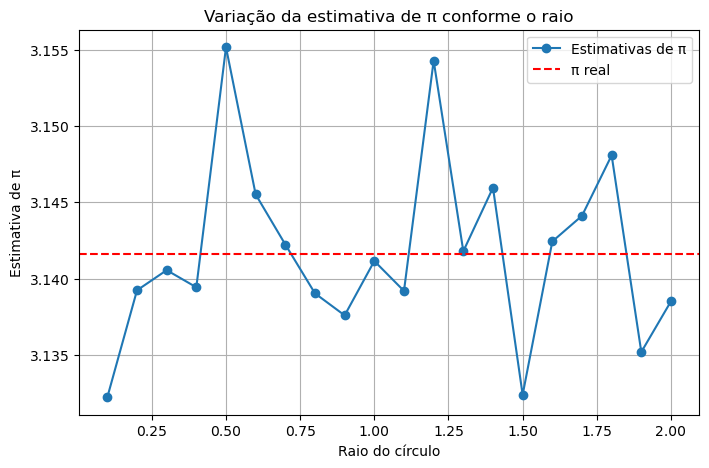

In [6]:
import matplotlib.pyplot as plt

# Vários raios igualmente espaçados
radii = np.linspace(0.1, 2.0, 20)
n = 100000
estimates = []

for r in radii:
    e, _, _, _ = estimate_pi(n, radius=r, seed=int(r*1000))
    estimates.append(e)

plt.figure(figsize=(8,5))
plt.plot(radii, estimates, 'o-', label='Estimativas de π')
plt.axhline(np.pi, color='r', linestyle='--', label='π real')
plt.xlabel("Raio do círculo")
plt.ylabel("Estimativa de π")
plt.title("Variação da estimativa de π conforme o raio")
plt.legend()
plt.grid(True)
plt.show()


4. Discuta: o que acontece se o círculo não estiver centralizado na origem?

Círculo centrado: π ≈ 3.140240
Círculo deslocado: π ≈ 2.251360  ← incorreto pois o círculo não está centralizado


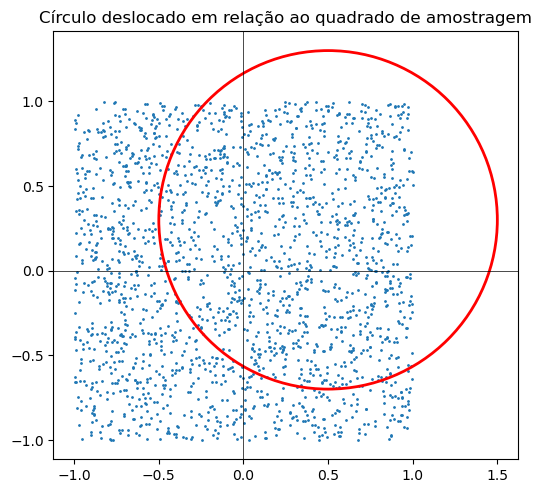

In [ ]:
import matplotlib.pyplot as plt

def estimate_pi_fixed_square(n, radius, circle_center=(0,0), square_center=(0,0), seed=None):

    rng = np.random.default_rng(seed)
    cx, cy = circle_center
    sx, sy = square_center
    x = rng.uniform(sx - radius, sx + radius, n)
    y = rng.uniform(sy - radius, sy + radius, n)
    inside = (x - cx)**2 + (y - cy)**2 <= radius**2
    ratio = np.sum(inside) / n
    return ratio, x, y, inside

ratio_centered, _, _, _ = estimate_pi_fixed_square(200000, 1.0, (0,0), (0,0), seed=1)
pi_centered = 4 * ratio_centered

ratio_offset, x, y, inside = estimate_pi_fixed_square(200000, 1.0, (0.5,0.3), (0,0), seed=2)
pi_offset = 4 * ratio_offset

print(f"Círculo centrado: π ≈ {pi_centered:.6f}")
print(f"Círculo deslocado: π ≈ {pi_offset:.6f}  ← incorreto pois o círculo não está centralizado")

plt.figure(figsize=(6,6))
plt.scatter(x[:2000], y[:2000], s=1)
circle = plt.Circle((0.5, 0.3), 1.0, fill=False, linewidth=2, color='r')
plt.gca().add_patch(circle)
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.title("Círculo deslocado em relação ao quadrado de amostragem")
plt.show()
